# Breast Cancer Prediction

<b>Dataset Used: Breast Cancer Wisconsin (Diagnostic)</b> (Wolberg, W. H., Street, W. N., & Mangasarian, O. L. (1994). UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

In this notebook I'll be using various classification methods for classifying whether an examble is Malignant (1) or Benign (0).

Artificial Neural Networks are implemented using the <i>NN_framework.py</i> file, and decision trees and ensemble methods are implemented using the <i>decision_tree.py</i> file.

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import random
from decision_tree import *
from ucimlrepo import fetch_ucirepo
import seaborn as sns
from NN_framework import NeuralNet
from sklearn import metrics

In [26]:
THRESH = 0.5

## Loading the dataset

In [2]:
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X_df = breast_cancer_wisconsin_diagnostic.data.features 
y_df = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
#print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables)

                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

<b>There are no null values</b>

In [3]:
X_df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X_df.tail()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
y_df.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [6]:
X_df.shape

(569, 30)

In [7]:
y_df.shape

(569, 1)

In [8]:
X_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
radius1,569.0,14.13,3.52,6.98,11.70,13.37,15.78,28.11
texture1,569.0,19.29,4.30,9.71,16.17,18.84,21.80,39.28
perimeter1,569.0,91.97,24.30,43.79,75.17,86.24,104.10,188.50
area1,569.0,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
smoothness1,569.0,0.10,0.01,0.05,0.09,0.10,0.11,0.16
compactness1,569.0,0.10,0.05,0.02,0.06,0.09,0.13,0.35
concavity1,569.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave_points1,569.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry1,569.0,0.18,0.03,0.11,0.16,0.18,0.20,0.30
fractal_dimension1,569.0,0.06,0.01,0.05,0.06,0.06,0.07,0.10


In [9]:
y_df['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
y_df.loc[:, 'Diagnosis'] = y_df['Diagnosis'].replace({"M":1, "B":0})

In [11]:
y_df.head()

,Diagnosis
0,1
1,1
2,1
3,1
4,1


<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

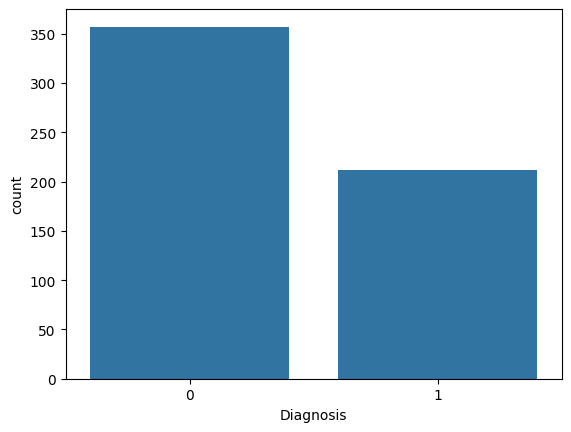

In [12]:
sns.countplot(x = 'Diagnosis', data = y_df)

<AxesSubplot:>

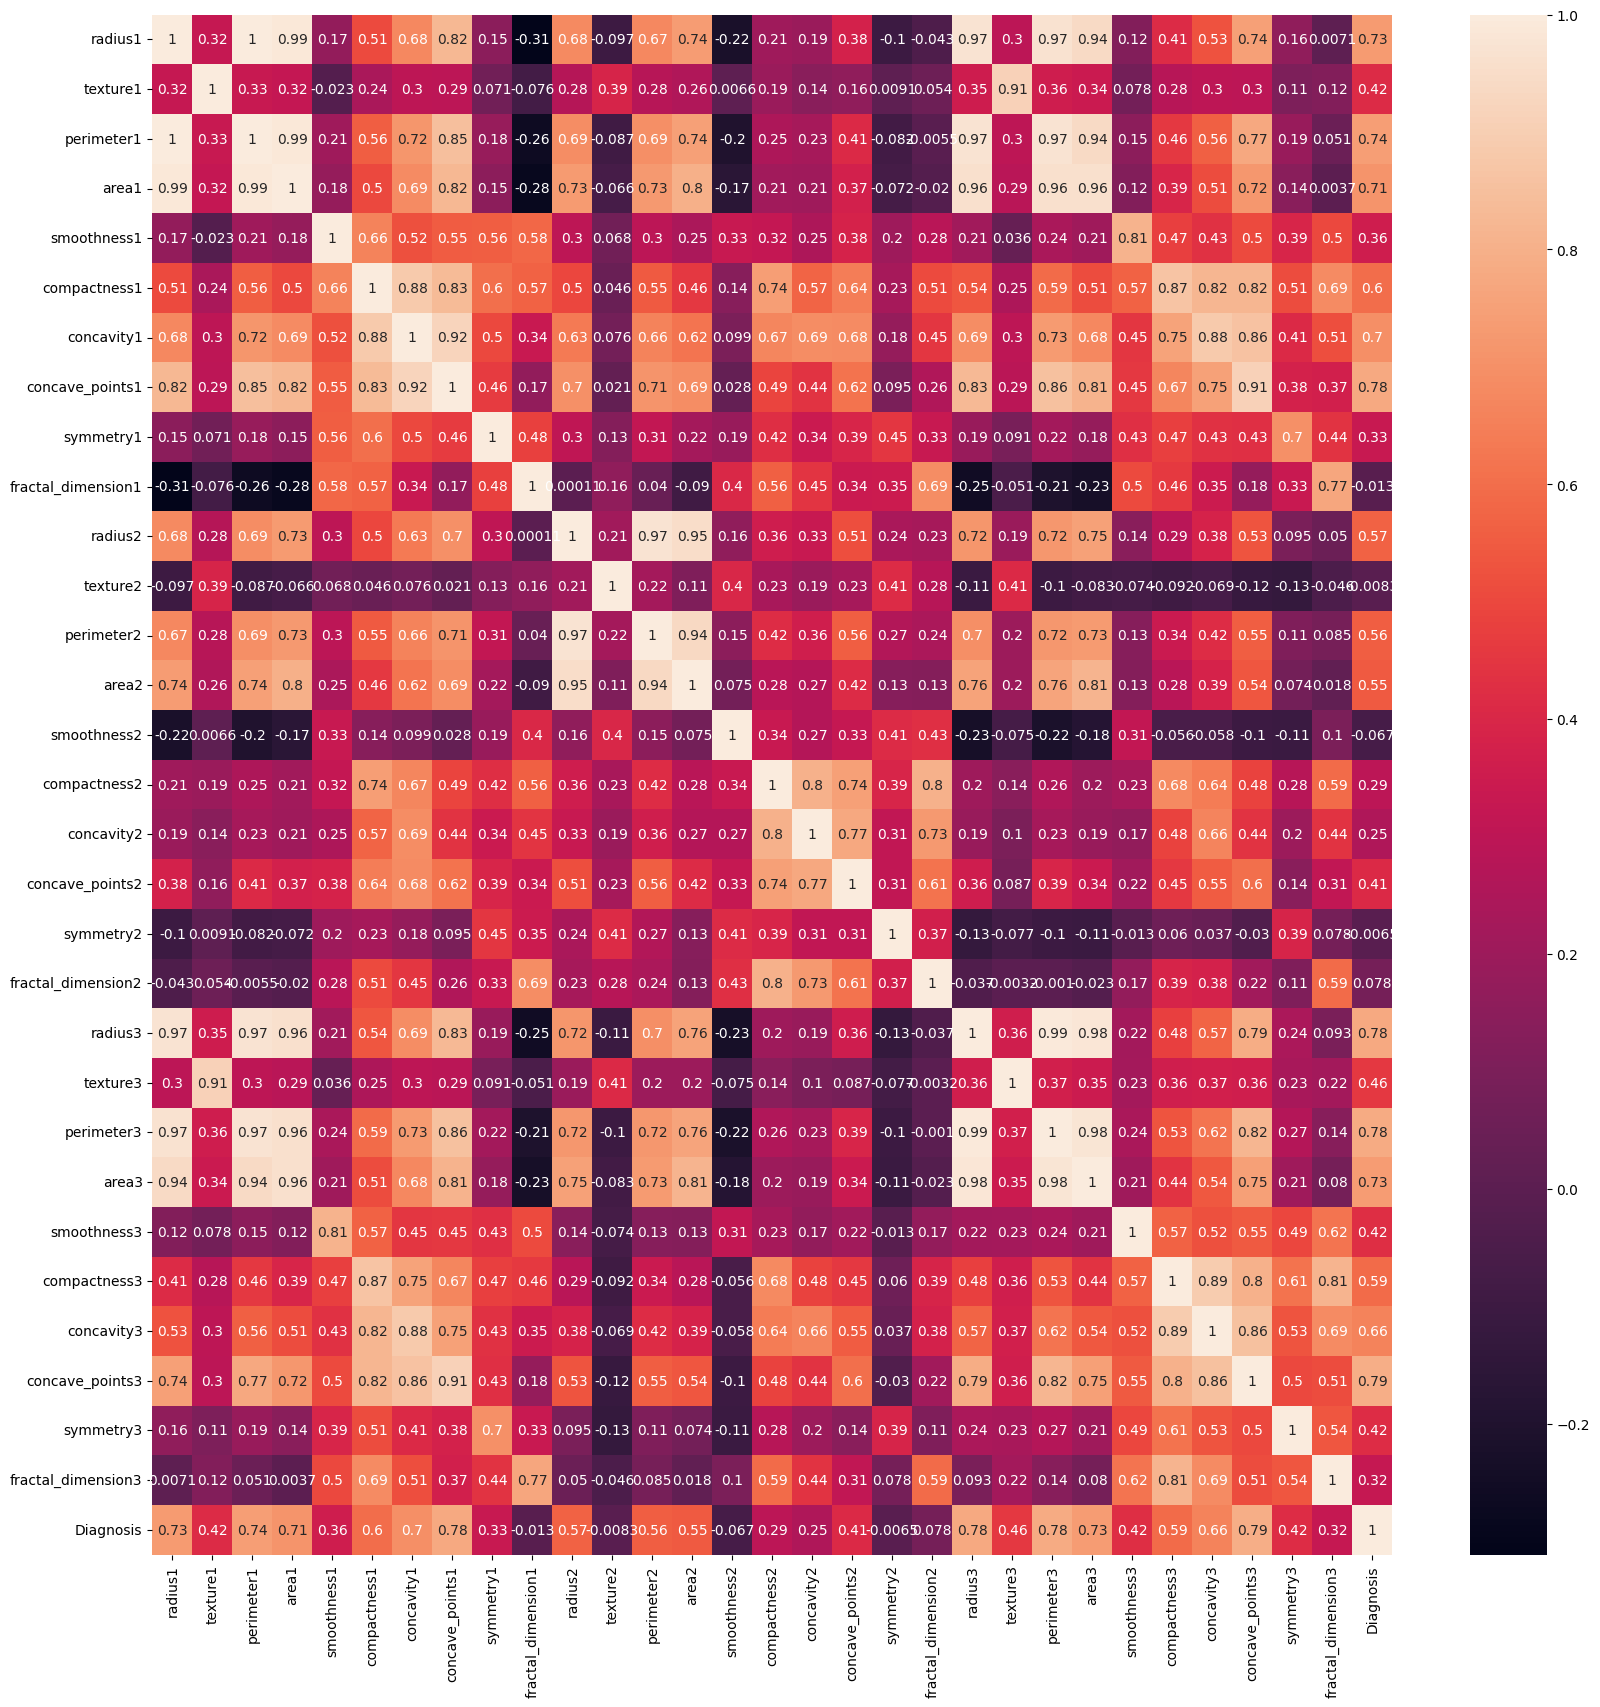

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(pandas.concat([X_df, y_df], axis=1).corr(),annot=True)

### Training and Cross-Validation split

In [14]:
def split_data(X, y, ratio):
    m = X.shape[0]
    randix = np.random.permutation(m)
    
    m_cv = (m*ratio[1])//100
    m_test = (m*ratio[2])//100

    at_index = 0

    X_cv = X[randix[0: m_cv]]
    y_cv = y[randix[0: m_cv]]
    X_test = X[randix[m_cv: m_test+m_cv]]
    y_test = y[randix[m_cv: m_test+m_cv]]
    X_train = X[randix[m_test+m_cv: ]]
    y_train = y[randix[m_test+m_cv: ]]

    return X_train, y_train, X_cv, y_cv, X_test, y_test 

In [22]:
X_train, y_train, X_cv, y_cv, _, _ = split_data(X_df.values, y_df.values.reshape(y_df.values.shape[0]).astype(float), (80, 20, 0))

print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"Train set info--> Malignant:{np.count_nonzero(y_train==1)} | Benign:{np.count_nonzero(y_train==0)}")
print(f"\n")
print(f"X_cv.shape: {X_cv.shape}")
print(f"y_cv.shape: {y_cv.shape}")
print(f"CV set info--> Malignant:{np.count_nonzero(y_cv==1)} | Benign:{np.count_nonzero(y_cv==0)}")

X_train.shape: (456, 30)
y_train.shape: (456,)
Train set info--> Malignant:165 | Benign:291


X_cv.shape: (113, 30)
y_cv.shape: (113,)
CV set info--> Malignant:47 | Benign:66


In [16]:
def evaluate_model_performance(y, y_pred, print_opt=True):
    confusion_matrix = metrics.confusion_matrix(y, y_pred)
    accuracy = metrics.accuracy_score(y, y_pred)
    precision = metrics.precision_score(y, y_pred)
    recall = metrics.recall_score(y, y_pred)
    F1_score = metrics.f1_score(y, y_pred)

    if print_opt:
        print(f"Accuracy: {accuracy}")
        print(f"Precision: {precision} | Recall: {recall}")
        print(f"F1 Score: {F1_score}")
    return confusion_matrix, accuracy, precision, recall, F1_score
    

## Logistic Regression

Logistic regression can be achieved by building a neural network with a single layer having sigmoid activation. 

<b> Normalising the data </b>

In [23]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train_norm = (X_train-mean)/std
X_cv_norm = (X_cv-mean)/std

In [102]:
LR = NeuralNet(X_train_norm.T, y_train.reshape(1, (len(y_train))), nodes=[1], activations=['sigmoid'], task='binary')

W1 shape: (1, 30)
b1 shape: (1, 1)
Total Parameters: 31


In [103]:
# by using regularization, model's performance increases on the cross-validation set
LR.train(epochs=1000, batch_size=-1, alpha=0.01, lambd=2)

At epoch 0 --> Accuracy: 20.395 | Cost: 0.7085622493903435
At epoch 100 --> Accuracy: 97.807 | Cost: 0.10144047955541853
At epoch 200 --> Accuracy: 98.246 | Cost: 0.08747450589318037
At epoch 300 --> Accuracy: 98.465 | Cost: 0.08348572298871598
At epoch 400 --> Accuracy: 98.465 | Cost: 0.08194908610547237
At epoch 500 --> Accuracy: 98.684 | Cost: 0.08122284834360297
At epoch 600 --> Accuracy: 98.684 | Cost: 0.08083143712947999
At epoch 700 --> Accuracy: 98.684 | Cost: 0.08061082966877726
At epoch 800 --> Accuracy: 98.684 | Cost: 0.08048740008752954
At epoch 900 --> Accuracy: 98.684 | Cost: 0.0804200421769274
At epoch 1000 --> Accuracy: 98.684 | Cost: 0.08038423250265397


In [125]:
LR_train_pred = (LR.forward_pass(LR.trained_param, X_train_norm.T) > THRESH).astype(int).reshape(X_train_norm.shape[0])

In [104]:
LR_cv_pred = (LR.forward_pass(LR.trained_param, X_cv_norm.T) > THRESH).astype(int).reshape(X_cv_norm.shape[0])

In [126]:
#Performace on the training set
_, _, _, _, _ = evaluate_model_performance(y_train, LR_train_pred)

Accuracy: 0.9868421052631579
Precision: 0.9877300613496932 | Recall: 0.9757575757575757
F1 Score: 0.9817073170731707


In [124]:
#Performace on the cross-validation set
LR_confusion_matrix, LR_accuracy, LR_precision, LR_recall, LR_F1_score = evaluate_model_performance(y_cv, LR_cv_pred)

Accuracy: 0.9734513274336283
Precision: 1.0 | Recall: 0.9361702127659575
F1 Score: 0.967032967032967


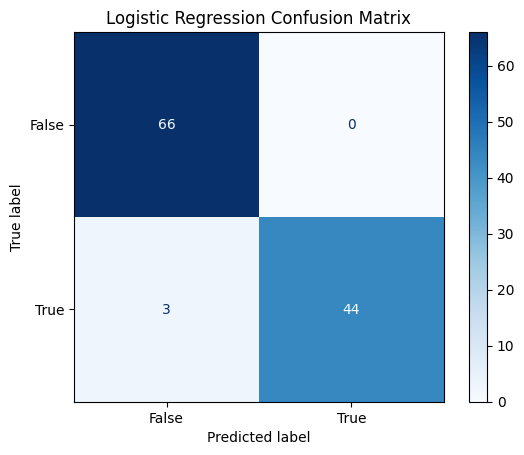

In [106]:
LR_cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix = LR_confusion_matrix, display_labels = [False, True])
LR_cm_plot.plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

<b> Logistics regression performs much better than expected! </b>

## Artifical Neural Network

Now we'll use a deep neural network with multiple hidden layers.

In [114]:
ANN = NeuralNet(X_train_norm.T, y_train.reshape(1, (len(y_train))), nodes=[32, 32, 1], 
                activations=['relu', 'relu', 'sigmoid'], task='binary')

W1 shape: (32, 30)
b1 shape: (32, 1)
W2 shape: (32, 32)
b2 shape: (32, 1)
W3 shape: (1, 32)
b3 shape: (1, 1)
Total Parameters: 2081


In [118]:
ANN.train(epochs=1000, batch_size=-1, alpha=0.01, lambd=1)

At epoch 0 --> Accuracy: 28.289 | Cost: 0.693381090401436
At epoch 100 --> Accuracy: 99.561 | Cost: 0.039859965393678684
At epoch 200 --> Accuracy: 100.0 | Cost: 0.030799508554112585
At epoch 300 --> Accuracy: 100.0 | Cost: 0.02970264894394649
At epoch 400 --> Accuracy: 100.0 | Cost: 0.029436768921425875
At epoch 500 --> Accuracy: 100.0 | Cost: 0.029307585300106218
At epoch 600 --> Accuracy: 100.0 | Cost: 0.02929178310534752
At epoch 700 --> Accuracy: 100.0 | Cost: 0.029249664740599764
At epoch 800 --> Accuracy: 100.0 | Cost: 0.029174793151891174
At epoch 900 --> Accuracy: 100.0 | Cost: 0.029173712382476947
At epoch 1000 --> Accuracy: 100.0 | Cost: 0.029164502775153547


In [127]:
ANN_train_pred = (ANN.forward_pass(ANN.trained_param, X_train_norm.T) > THRESH).astype(int).reshape(X_train_norm.shape[0])

In [119]:
ANN_cv_pred = (ANN.forward_pass(ANN.trained_param, X_cv_norm.T) > THRESH).astype(int).reshape(X_cv_norm.shape[0])

In [129]:
#Performance on the training set
_, _, _, _, _ = evaluate_model_performance(y_train, ANN_train_pred)

Accuracy: 1.0
Precision: 1.0 | Recall: 1.0
F1 Score: 1.0


In [128]:
#Performance on the cross-validation set
ANN_confusion_matrix, ANN_accuracy, ANN_precision, ANN_recall, ANN_F1_score = evaluate_model_performance(y_cv, ANN_cv_pred)

Accuracy: 0.9734513274336283
Precision: 0.9782608695652174 | Recall: 0.9574468085106383
F1 Score: 0.967741935483871


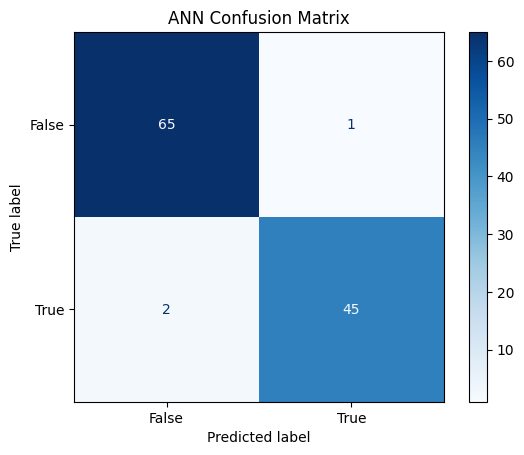

In [121]:
ANN_cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix = ANN_confusion_matrix, display_labels = [False, True])
ANN_cm_plot.plot(cmap='Blues')
plt.title('ANN Confusion Matrix')
plt.show()

<b>A tiny improvement over logistics regression overall</b>

## DecisionTree

In [122]:
DT = DecisionTree(X_train, y_train, task='classification')

In [193]:
DT.build_tree(max_depth=5) #constraints added to prevent over-fitting

 Depth 0,Root: Split on feature: 22
- Depth 1,Left: Split on feature: 27
-- Depth 2,Left: Split on feature: 10
--- Depth 3,Left: Split on feature: 21
    ---- Depth 4, Left leaf with indices [  0   1   2   5   6   7  10  11  13  15  17  18  23  24  28  29  30  31
  33  35  39  41  42  43  44  45  48  50  51  53  54  57  58  59  60  62
  63  67  69  70  75  77  79  82  83  84  87  88  92  93  94  95  96  98
 100 101 103 106 108 110 111 114 116 118 121 125 127 129 131 133 136 138
 139 146 150 151 153 157 158 161 163 165 166 169 172 173 174 176 177 182
 188 190 191 193 196 197 200 206 208 211 216 219 221 222 223 225 226 227
 228 229 231 232 233 236 237 238 240 242 243 244 246 248 249 252 254 255
 256 259 260 262 263 267 268 270 271 272 278 280 282 283 284 285 287 290
 291 300 302 303 304 305 307 308 310 314 315 319 322 323 324 327 328 330
 332 334 336 337 338 339 341 342 344 346 347 349 354 357 358 361 362 363
 364 366 368 369 370 371 373 377 378 380 381 383 386 387 389 392 393 394
 396 3

In [198]:
DT_train_pred = DT.run_inference(X_train, DT.tree)

In [199]:
#Performance on the training set
_, _, _, _, _ = evaluate_model_performance(y_train, DT_train_pred)

Accuracy: 0.993421052631579
Precision: 0.9821428571428571 | Recall: 1.0
F1 Score: 0.9909909909909909


In [200]:
DT_cv_pred = DT.run_inference(X_cv, DT.tree)

In [208]:
#Performance on the cross-validation set
DT_confusion_matrix, DT_accuracy, DT_precision, DT_recall, DT_F1_score = evaluate_model_performance(y_cv, DT_cv_pred)

Accuracy: 0.9292035398230089
Precision: 0.9333333333333333 | Recall: 0.8936170212765957
F1 Score: 0.9130434782608695


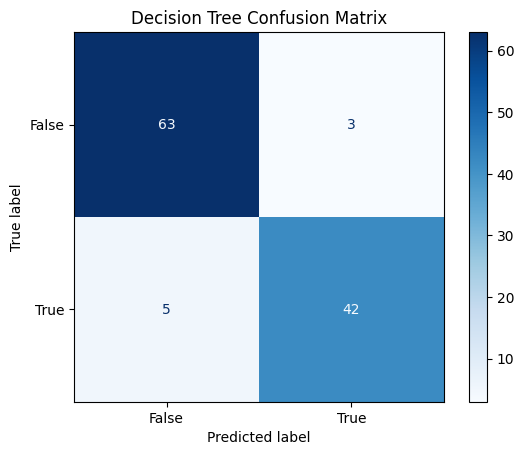

In [202]:
DT_cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix = DT_confusion_matrix, display_labels = [False, True])
DT_cm_plot.plot(cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

<b>Doesn't generalize that well</b>

## Bagging

Bagging is achieved by considering all the features at every split. This is done by setting the <i>num_features</i> parameter to 'all'.

In [203]:
BC = RandomForest(X_train, y_train, 'classification')

In [223]:
BC.build_ensemble(num_trees=100, max_depth=5, num_features='all')

Building Tree 1.......
Building Tree 2.......
Building Tree 3.......
Building Tree 4.......
Building Tree 5.......
Building Tree 6.......
Building Tree 7.......
Building Tree 8.......
Building Tree 9.......
Building Tree 10.......
Building Tree 11.......
Building Tree 12.......
Building Tree 13.......
Building Tree 14.......
Building Tree 15.......
Building Tree 16.......
Building Tree 17.......
Building Tree 18.......
Building Tree 19.......
Building Tree 20.......
Building Tree 21.......
Building Tree 22.......
Building Tree 23.......
Building Tree 24.......
Building Tree 25.......
Building Tree 26.......
Building Tree 27.......
Building Tree 28.......
Building Tree 29.......
Building Tree 30.......
Building Tree 31.......
Building Tree 32.......
Building Tree 33.......
Building Tree 34.......
Building Tree 35.......
Building Tree 36.......
Building Tree 37.......
Building Tree 38.......
Building Tree 39.......
Building Tree 40.......
Building Tree 41.......
Building Tree 42.......
B

In [224]:
BC_train_pred = BC.run_inference_on_ensemble(X_train, BC.ensemble)

In [225]:
#Performance on the training set
_, _, _, _, _ = evaluate_model_performance(y_train, BC_train_pred)

Accuracy: 0.9978070175438597
Precision: 1.0 | Recall: 0.9939393939393939
F1 Score: 0.9969604863221885


In [226]:
BC_cv_pred = BC.run_inference_on_ensemble(X_cv, BC.ensemble)

In [227]:
#Performance on the cross-validation set
BC_confusion_matrix, BC_accuracy, BC_precision, BC_recall, BC_F1_score = evaluate_model_performance(y_cv, BC_cv_pred)

Accuracy: 0.9292035398230089
Precision: 0.9333333333333333 | Recall: 0.8936170212765957
F1 Score: 0.9130434782608695


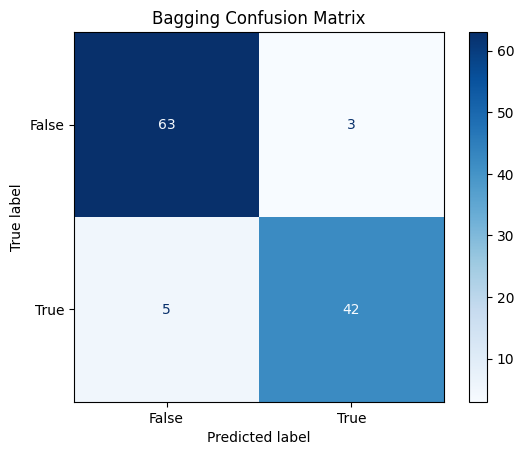

In [228]:
BC_cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix = BC_confusion_matrix, display_labels = [False, True])
BC_cm_plot.plot(cmap='Blues')
plt.title('Bagging Confusion Matrix')
plt.show()

<b>No improvement over a single decision tree</b>

## Random Forest

In [229]:
RF = RandomForest(X_train, y_train, 'classification')

In [242]:
RF.build_ensemble(num_trees=200, max_depth=5, num_features=5)

Building Tree 1.......
Building Tree 2.......
Building Tree 3.......
Building Tree 4.......
Building Tree 5.......
Building Tree 6.......
Building Tree 7.......
Building Tree 8.......
Building Tree 9.......
Building Tree 10.......
Building Tree 11.......
Building Tree 12.......
Building Tree 13.......
Building Tree 14.......
Building Tree 15.......
Building Tree 16.......
Building Tree 17.......
Building Tree 18.......
Building Tree 19.......
Building Tree 20.......
Building Tree 21.......
Building Tree 22.......
Building Tree 23.......
Building Tree 24.......
Building Tree 25.......
Building Tree 26.......
Building Tree 27.......
Building Tree 28.......
Building Tree 29.......
Building Tree 30.......
Building Tree 31.......
Building Tree 32.......
Building Tree 33.......
Building Tree 34.......
Building Tree 35.......
Building Tree 36.......
Building Tree 37.......
Building Tree 38.......
Building Tree 39.......
Building Tree 40.......
Building Tree 41.......
Building Tree 42.......
B

In [243]:
RF_train_pred = RF.run_inference_on_ensemble(X_train, RF.ensemble)

In [244]:
#Performance on the training set
_, _, _, _, _ = evaluate_model_performance(y_train, RF_train_pred)

Accuracy: 0.993421052631579
Precision: 1.0 | Recall: 0.9818181818181818
F1 Score: 0.9908256880733944


In [245]:
RF_cv_pred = RF.run_inference_on_ensemble(X_cv, RF.ensemble)

In [246]:
#Performance on the cross-validation set
RF_confusion_matrix, RF_accuracy, RF_precision, RF_recall, RF_F1_score = evaluate_model_performance(y_cv, RF_cv_pred)

Accuracy: 0.9557522123893806
Precision: 0.9565217391304348 | Recall: 0.9361702127659575
F1 Score: 0.9462365591397849


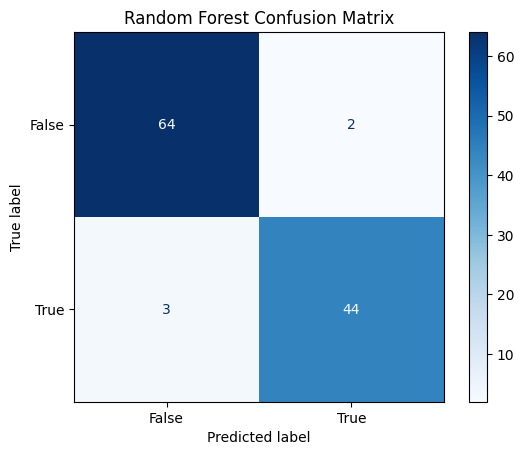

In [247]:
RF_cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix = RF_confusion_matrix, display_labels = [False, True])
RF_cm_plot.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

<b>Better than bagging!</b>

## AdaBoost

In [307]:
ABC = AdaBoostClassifier(X_train, y_train)

In [308]:
ABC.train(n_learners=30, depth=1 ,store_error=True, X_cv=X_cv, y_cv=y_cv)

Building learner: 1....
Building learner: 2....
Building learner: 3....
Building learner: 4....
Building learner: 5....
Building learner: 6....
Building learner: 7....
Building learner: 8....
Building learner: 9....
Building learner: 10....
Building learner: 11....
Building learner: 12....
Building learner: 13....
Building learner: 14....
Building learner: 15....
Building learner: 16....
Building learner: 17....
Building learner: 18....
Building learner: 19....
Building learner: 20....
Building learner: 21....
Building learner: 22....
Building learner: 23....
Building learner: 24....
Building learner: 25....
Building learner: 26....
Building learner: 27....
Building learner: 28....
Building learner: 29....
Building learner: 30....


In [309]:
ABC_train_pred = ABC.predict(X_train, ABC.learners)

In [310]:
#Performance on the training set
_, _, _, _, _ = evaluate_model_performance(y_train, ABC_train_pred)

Accuracy: 0.9692982456140351
Precision: 0.9364161849710982 | Recall: 0.9818181818181818
F1 Score: 0.9585798816568047


In [311]:
ABC_cv_pred = ABC.predict(X_cv, ABC.learners)

In [312]:
#Performance on the cross-validation set
ABC_confusion_matrix, ABC_accuracy, ABC_precision, ABC_recall, ABC_F1_score = evaluate_model_performance(y_cv, ABC_cv_pred)

Accuracy: 0.9557522123893806
Precision: 0.9375 | Recall: 0.9574468085106383
F1 Score: 0.9473684210526315


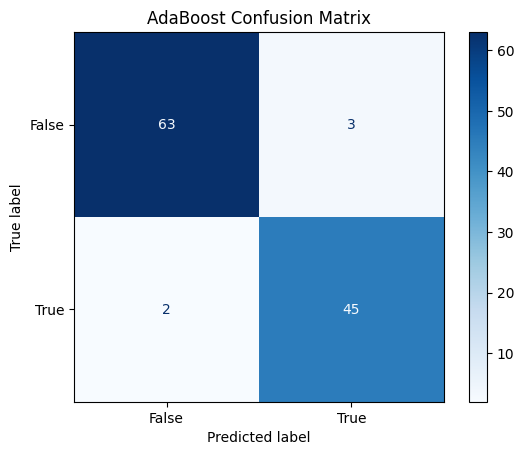

In [313]:
ABC_cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix = ABC_confusion_matrix, display_labels = [False, True])
ABC_cm_plot.plot(cmap='Blues')
plt.title('AdaBoost Confusion Matrix')
plt.show()

<b>Pretty similar performance to Random Forest</b>

## GradientBoost

In [315]:
GBC = GradientBoostClassifier(X_train, y_train)

In [317]:
GBC.train(learning_rate=0.1, n_trees=200, max_depth=5, store_hist=True, X_cv=X_cv, y_cv=y_cv)

Buidling tree: 1....
Buidling tree: 2....
Buidling tree: 3....
Buidling tree: 4....
Buidling tree: 5....
Buidling tree: 6....
Buidling tree: 7....
Buidling tree: 8....
Buidling tree: 9....
Buidling tree: 10....
Buidling tree: 11....
Buidling tree: 12....
Buidling tree: 13....
Buidling tree: 14....
Buidling tree: 15....
Buidling tree: 16....
Buidling tree: 17....
Buidling tree: 18....
Buidling tree: 19....
Buidling tree: 20....
Buidling tree: 21....
Buidling tree: 22....
Buidling tree: 23....
Buidling tree: 24....
Buidling tree: 25....
Buidling tree: 26....
Buidling tree: 27....
Buidling tree: 28....
Buidling tree: 29....
Buidling tree: 30....
Buidling tree: 31....
Buidling tree: 32....
Buidling tree: 33....
Buidling tree: 34....
Buidling tree: 35....
Buidling tree: 36....
Buidling tree: 37....
Buidling tree: 38....
Buidling tree: 39....
Buidling tree: 40....
Buidling tree: 41....
Buidling tree: 42....
Buidling tree: 43....
Buidling tree: 44....
Buidling tree: 45....
Buidling tree: 46..

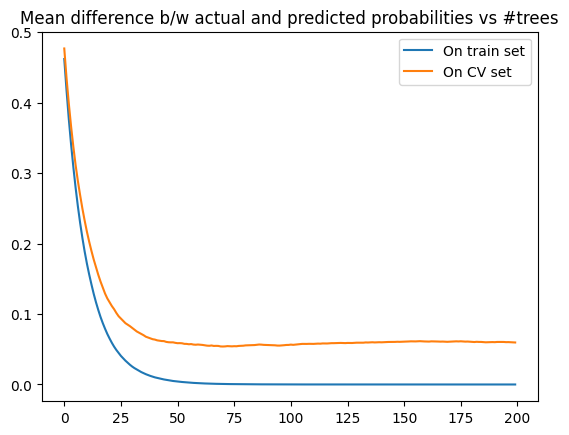

In [322]:
plt.plot(GBC.train_error_hist, label='On train set')
plt.plot(GBC.cv_error_hist, label='On CV set')
plt.title("Mean difference b/w actual and predicted probabilities vs #trees")
plt.legend()

The mean difference between b/w actual and predicted probabilities on the CV set appears to be minimum at around 70 trees.

In [329]:
GBC_train_pred = GBC.predict(X_train, GBC.trees[:70], enable_thresh=True)

In [330]:
#Performance on the training set
_, _, _, _, _ = evaluate_model_performance(y_train, GBC_train_pred)

Accuracy: 1.0
Precision: 1.0 | Recall: 1.0
F1 Score: 1.0


In [331]:
GBC_cv_pred = GBC.predict(X_cv, GBC.trees[:70], enable_thresh=True)

In [332]:
#Performance on the cross-validation set
GBC_confusion_matrix, GBC_accuracy, GBC_precision, GBC_recall, GBC_F1_score = evaluate_model_performance(y_cv, GBC_cv_pred)

Accuracy: 0.9557522123893806
Precision: 0.9565217391304348 | Recall: 0.9361702127659575
F1 Score: 0.9462365591397849


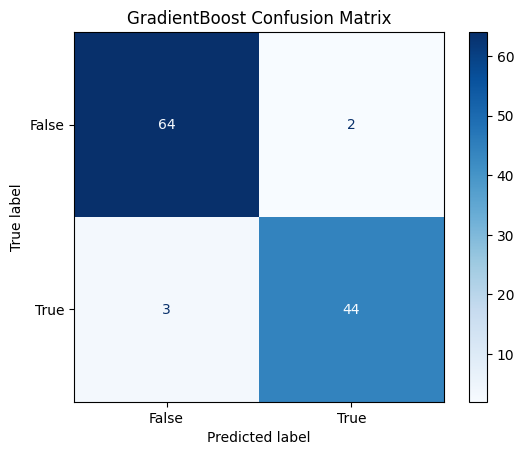

In [333]:
GBC_cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix = GBC_confusion_matrix, display_labels = [False, True])
GBC_cm_plot.plot(cmap='Blues')
plt.title('GradientBoost Confusion Matrix')
plt.show()

## Comparing all the methods
Using the F1 Score as the metric for model performance

In [351]:
models = ['LinearRegression', 'ANN', 'DecisionTree', 'Bagging', 'RandomForest', 'AdaBoost', 'GradientBoost']
F1_scores = [LR_F1_score, ANN_F1_score, DT_F1_score, BC_F1_score, RF_F1_score, ABC_F1_score, GBC_F1_score]
precision_values = [LR_precision, ANN_precision, DT_precision, BC_precision, RF_precision, ABC_precision, GBC_precision]
recall_values = [LR_recall, ANN_recall, DT_recall, BC_recall, RF_recall, ABC_recall, GBC_recall]

Text(0.5, 1.0, 'Model Performance')

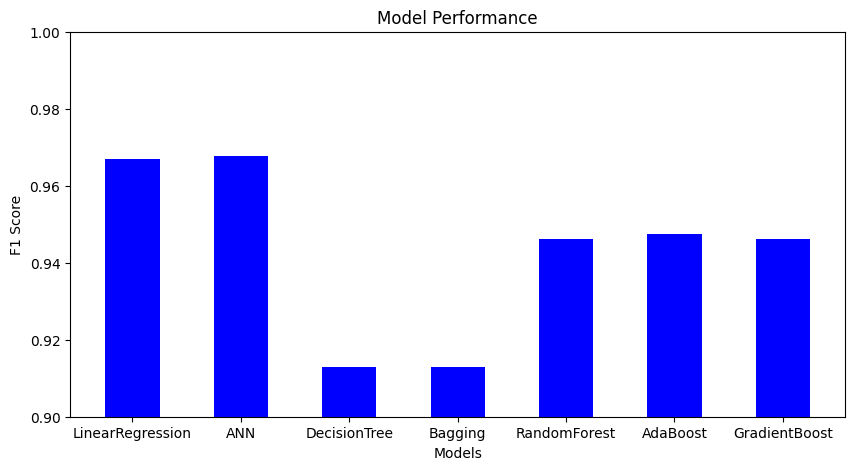

In [359]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(models, F1_scores, color='blue', width=0.5)
ax.set_ylim(0.9, 1.0)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title("Model Performance")

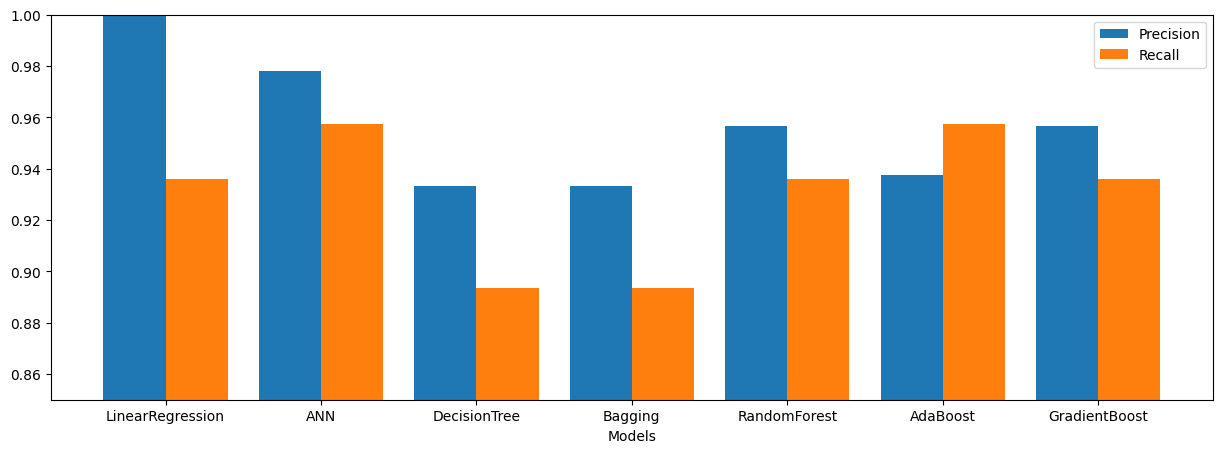

In [356]:
fig2, ax2 = plt.subplots(figsize = (15, 5))
X_axis = np.arange(len(models))
ax2.bar(X_axis - 0.2, precision_values, 0.4, label = 'Precision') 
ax2.bar(X_axis + 0.2, recall_values, 0.4, label = 'Recall') 
ax2.set_ylim(0.85, 1.0)

plt.xticks(X_axis, models)
plt.xlabel("Models")
plt.legend()